# Exploratory Data Analysis



Documentation:
- https://github.com/fivethirtyeight/data/tree/master/pollster-ratings

We will be looking at `raw-polls.csv`

In [1]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from plotnine import *

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# read raw_polls.csv from FiveThirtyEighta
raw_polls_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv'
polls = pd.read_csv(raw_polls_url, parse_dates=['electiondate', 'polldate'])

# saves a copy of this CSV onto your computer
polls.to_csv('raw_polls.csv', index=False) 

# add a column to separate national polls from state level polls
polls['national'] = polls['location'].apply(lambda x: True if x=='US' else False)

# add a column that counts the days until the election
polls['days_until_election'] = polls['electiondate'] - polls['polldate']

# show the first 2 rows of the data frame
polls.head(2)

poll_id  question_id  race_id  year           race location type_simple  \
0    26013        87909     1455  1998  1998_Gov-G_NY       NY       Gov-G   
1    26255        87926     1456  1998  1998_Gov-G_OH       OH       Gov-G   

  type_detail                              pollster  pollster_rating_id  \
0       Gov-G              Blum & Weprin Associates                  32   
1       Gov-G  University of Cincinnati (Ohio Poll)                 346   

  methodology partisan   polldate  samplesize     cand1_name  cand1_id  \
0  Live Phone      NaN 1998-10-13       364.0  Peter Vallone     13080   
1  Live Phone      NaN 1998-10-13       540.0     Lee Fisher     13085   

  cand1_party  cand1_pct     cand2_name  cand2_id cand2_party  cand2_pct  \
0         DEM       26.0  George Pataki     13083         REP       57.0   
1         DEM       37.0       Bob Taft     13086         REP       52.0   

   cand3_pct  margin_poll electiondate  cand1_actual  cand2_actual  \
0        9.0        -31.0   1998-11-03         33.16         54.32   
1        NaN        -15.0   1998-11-03         44.69         50.05   

   margin_actual  error  bias  rightcall  advancedplusminus  \
0         -21.15   9.85 -9.85        1.0           1.461561   
1          -5.36   9.64 -9.64        1.0           4.285789   

                                        comment  national days_until_election  
0  for New York Daily News | WABC-TV (New York)     False             21 days  
1                                           NaN     False             21 days

Remember, `raw_polls.csv` contains all polls within 3 weeks of any:
- presidential primary or general election (state and national level)
- senate, gubernatorial, or house general election
- national level generic house polls

_hint: you may want to do some filtering as you do your analysis!_

# Descriptive Stats

In [3]:
# example of summary statistics using describe()
# hint...you may want to try some summary statistics after applying filters
polls.describe()[['error', 'bias']].round(2)

error     bias
count  10776.00  8824.00
mean       5.51     0.63
std        4.87     6.33
min        0.00   -40.24
25%        2.02    -3.33
50%        4.34     0.68
75%        7.58     4.62
max       50.89    42.94

In [4]:
# example of a pivot table
piv = polls.pivot_table(
    index='year',
    columns='type_simple',
    values='error',
    aggfunc=['mean', 'std', 'count']
).round(1).fillna('')

piv

mean                               std                        \
type_simple Gov-G House-G Pres-G Pres-P Sen-G Gov-G House-G Pres-G Pres-P   
year                                                                        
1998          8.1     6.9                 6.8   5.5     5.7                 
1999          6.6                               6.3                         
2000          3.7     4.6    4.4    7.9   5.4   3.1     3.2    3.2    5.5   
2001          3.4                               2.4                         
2002          5.4     5.5                 4.9   3.8     3.7                 
2003          7.1                               4.8                         
2004          3.2     5.4    3.1    7.1   5.0   2.1     3.4    2.4    6.9   
2005          3.7                               2.2                         
2006          4.7     6.0                 5.2   3.7     4.4                 
2007          3.7     2.8                       1.7                         
2008          4.7     5.8    3.4    7.4   4.9   4.1     4.9    3.0    6.3   
2009          4.0     6.2                       3.0     5.6                 
2010          4.7     6.7                 5.4   3.7     5.6                 
2011          5.5     3.7                       2.6     4.2                 
2012          4.7     5.4    3.6    8.6   4.7   3.5     5.3    2.7    7.0   
2013          5.7    10.9                 3.4   4.2     4.6                 
2014          4.8     6.7                 5.3   4.2     6.1                 
2015          6.3    23.0                       4.0                         
2016          6.2     5.3    5.0    9.4   5.4   4.7     4.6    3.9    7.8   
2017          5.2     4.0                 6.0   4.1     2.8                 
2018          4.7     4.9                 4.1   3.2     4.4                 
2019          4.9     6.2                       4.2     5.3                 
2020          7.0     6.6    4.8   10.2   5.6   4.7     4.5    3.2    8.3   

                   count                               
type_simple Sen-G  Gov-G House-G Pres-G Pres-P  Sen-G  
year                                                   
1998          4.5  120.0    57.0                102.0  
1999                 4.0                               
2000          4.5   43.0    67.0  375.0  187.0  194.0  
2001                13.0                               
2002          4.1  190.0   105.0                158.0  
2003                38.0                               
2004          4.2   37.0   102.0  432.0  131.0  187.0  
2005                26.0                               
2006          4.3  212.0   224.0                233.0  
2007                 8.0     1.0                       
2008          4.7   57.0   162.0  564.0  636.0  220.0  
2009                39.0     9.0                       
2010          4.5  261.0   252.0                304.0  
2011                 6.0    11.0                       
2012          3.3   57.0   135.0  471.0  222.0  245.0  
2013          3.2   22.0     4.0                 22.0  
2014          4.2  226.0   117.0                226.0  
2015                20.0     1.0                       
2016          4.5   69.0    65.0  508.0  458.0  271.0  
2017          2.7   31.0    21.0                 19.0  
2018          3.1  165.0   209.0                187.0  
2019                25.0     4.0                       
2020          3.9   43.0   106.0  590.0  187.0  283.0

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1959 rows containing missing values.


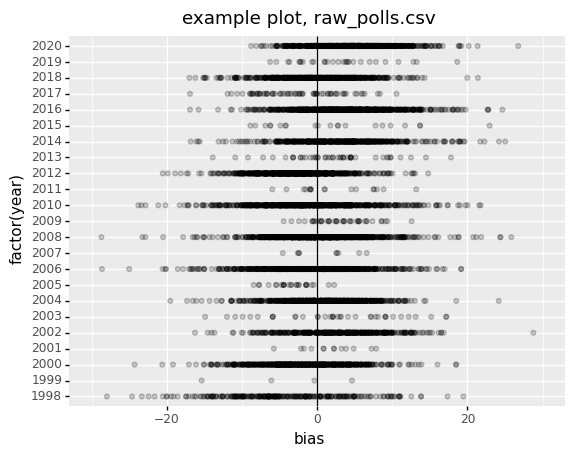

<ggplot: (339313743)>

In [5]:
# Example dot plot
# You can also use other chart types (like histograms) if you'd like!
# Hint: Make sure you read the warnings in red whenever they appear!

(
    ggplot() + 
        geom_point(polls, aes(x='bias', y='factor(year)'), alpha=.2, fill='black') + 
        geom_vline(aes(xintercept=0)) +
        xlim(-30, 30) + 
        labs(title = "example plot, raw_polls.csv")
)


/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 102'. Pick better value with 'binwidth'.


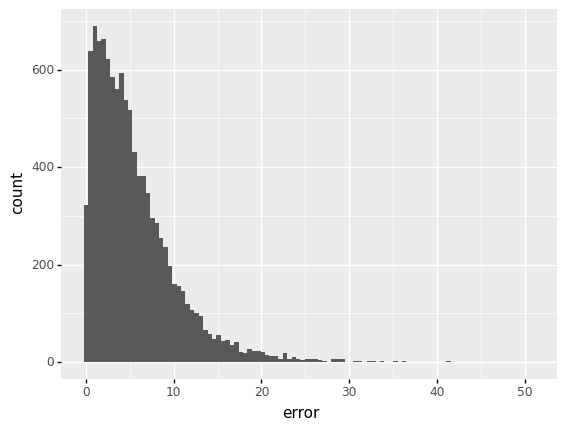

<ggplot: (339161561)>

In [6]:
# example histogram
# hint: you may want try filtering or using facet_wrap
(
    ggplot() + 
        geom_histogram(polls, aes(x='error'))
)


👉Your turn! Modify the cells above to get a better sense of the "shape" of the data. 
Conduct more exploratory data visualization below. What questions do you have about this data? 

### Hypothesis: Public opinion polling in the US is becoming less reliable.

In the notebook below, explore this hypothesis. Is it true? Is it false? Is it...complicated? _(hint: it's complicated)_

Explain your answer below. You can use words (in markdown cells like this one) and visuzalizations in either plotnine or ggplot2.

## Response 1

When you're doing exploratory data analysis, sometimes you can draw conclusions, sometimes the analysis raises more questions. Show a peice of your analysis below in Python -- the cell can output a dataframe, a chart, or something else, just make sure to print the variables you'd like us to look at as output from the cell. In the markdown cell that follows, first explain either the conclusion you drew or the new question you have. Then answer the questions about that analysis.

In [10]:
# Your analysis code here (it can output a chart, a dataframe, or something else). 
# Feel free to add a few more cells here if you need them to keep your code clean,
# Just make sure you print out the variable you want me to look at in the last cell 👉

polls.head()


poll_id  question_id  race_id  year           race location type_simple  \
0    26013        87909     1455  1998  1998_Gov-G_NY       NY       Gov-G   
1    26255        87926     1456  1998  1998_Gov-G_OH       OH       Gov-G   
2    26026        31266     1736  1998  1998_Sen-G_NV       NV       Sen-G   
3    26013        31253     1738  1998  1998_Sen-G_NY       NY       Sen-G   
4    63632       117103     1738  1998  1998_Sen-G_NY       NY       Sen-G   

  type_detail                              pollster  pollster_rating_id  \
0       Gov-G              Blum & Weprin Associates                  32   
1       Gov-G  University of Cincinnati (Ohio Poll)                 346   
2       Sen-G                          FM3 Research                  91   
3       Sen-G              Blum & Weprin Associates                  32   
4       Sen-G        Garin-Hart-Yang Research Group                 113   

  methodology partisan   polldate  samplesize          cand1_name  cand1_id  \
0  Live Phone      NaN 1998-10-13       364.0       Peter Vallone     13080   
1  Live Phone      NaN 1998-10-13       540.0          Lee Fisher     13085   
2  Live Phone        D 1998-10-13       488.0          Harry Reid      3964   
3  Live Phone      NaN 1998-10-13       364.0  Charles E. Schumer      3966   
4  Live Phone        D 1998-10-13       902.0  Charles E. Schumer      3966   

  cand1_party  cand1_pct          cand2_name  cand2_id cand2_party  cand2_pct  \
0         DEM       26.0       George Pataki     13083         REP       57.0   
1         DEM       37.0            Bob Taft     13086         REP       52.0   
2         DEM       49.0         John Ensign      3965         REP       44.0   
3         DEM       44.0  Alfonse M. D'Amato      3967         REP       52.0   
4         DEM       46.0  Alfonse M. D'Amato      3967         REP       42.0   

   cand3_pct  margin_poll electiondate  cand1_actual  cand2_actual  \
0        9.0        -31.0   1998-11-03         33.16         54.32   
1        NaN        -15.0   1998-11-03         44.69         50.05   
2        NaN          5.0   1998-11-03         47.86         47.77   
3        NaN         -8.0   1998-11-03         54.62         44.08   
4        NaN          4.0   1998-11-03         54.62         44.08   

   margin_actual  error   bias  rightcall  advancedplusminus  \
0         -21.15   9.85  -9.85        1.0           1.461561   
1          -5.36   9.64  -9.64        1.0           4.285789   
2           0.09   4.91   4.91        1.0          -1.023784   
3          10.54  18.54 -18.54        0.0          10.064104   
4          10.54   6.54  -6.54        1.0          -1.972391   

                                        comment  national days_until_election  
0  for New York Daily News | WABC-TV (New York)     False             21 days  
1                                           NaN     False             21 days  
2            for unspecified Democratic sponsor     False             21 days  
3  for New York Daily News | WABC-TV (New York)     False             21 days  
4                        for Charles E. Schumer     False             21 days

# Want to see poll error for pollsters on the democratic side for presidential primaries

In [22]:
democratic_pollsters = polls[polls.partisan == 'D']
democratic_pollsters.head()


poll_id  question_id  race_id  year               race location  \
2     26026        31266     1736  1998      1998_Sen-G_NV       NV   
4     63632       117103     1738  1998      1998_Sen-G_NY       NY   
6     64053       117875     1966  1998  1998_House-G_ID-1     ID-1   
7     64053       117876     1967  1998  1998_House-G_ID-2     ID-2   
12    54273        87809     1444  1998      1998_Gov-G_IA       IA   

   type_simple type_detail                         pollster  \
2        Sen-G       Sen-G                     FM3 Research   
4        Sen-G       Sen-G   Garin-Hart-Yang Research Group   
6      House-G     House-G   Garin-Hart-Yang Research Group   
7      House-G     House-G   Garin-Hart-Yang Research Group   
12       Gov-G       Gov-G  Drake Research & Strategy, Inc.   

    pollster_rating_id methodology partisan   polldate  samplesize  \
2                   91  Live Phone        D 1998-10-13       488.0   
4                  113  Live Phone        D 1998-10-13       902.0   
6                  113  Live Phone        D 1998-10-13       372.0   
7                  113  Live Phone        D 1998-10-13       400.0   
12                 329  Live Phone        D 1998-10-14       408.0   

            cand1_name  cand1_id cand1_party  cand1_pct          cand2_name  \
2           Harry Reid      3964         DEM       49.0         John Ensign   
4   Charles E. Schumer      3966         DEM       46.0  Alfonse M. D'Amato   
6         Dan Williams     13924         DEM       44.0     Helen Chenoweth   
7    Richard Stallings     13926         DEM       42.0        Mike Simpson   
12         Tom Vilsack     13039         DEM       40.0       Jim Lightfoot   

    cand2_id cand2_party  cand2_pct  cand3_pct  margin_poll electiondate  \
2       3965         REP       44.0        NaN          5.0   1998-11-03   
4       3967         REP       42.0        NaN          4.0   1998-11-03   
6      13925         REP       42.0        NaN          2.0   1998-11-03   
7      13927         REP       36.0        NaN          6.0   1998-11-03   
12     13036         REP       48.0        NaN         -8.0   1998-11-03   

    cand1_actual  cand2_actual  margin_actual  error   bias  rightcall  \
2          47.86         47.77           0.09   4.91   4.91        1.0   
4          54.62         44.08          10.54   6.54  -6.54        1.0   
6          44.73         55.27         -10.53  12.53  12.53        0.0   
7          44.69         52.51          -7.82  13.82  13.82        0.0   
12         52.30         46.51           5.80  13.80 -13.80        0.0   

    advancedplusminus                             comment  national  \
2           -1.023784  for unspecified Democratic sponsor     False   
4           -1.972391              for Charles E. Schumer     False   
6            4.738113               for Richard Stallings     False   
7            6.113068               for Richard Stallings     False   
12           5.071034                     for Tom Vilsack     False   

   days_until_election  
2              21 days  
4              21 days  
6              21 days  
7              21 days  
12             20 days

In [28]:
pres_g_dem = democratic_pollsters.query('type_simple == "Pres-G"')

In [29]:
pres_g_dem.groupby(['year','pollster']).error.mean().to_frame().reset_index().sort_values('error')

year                         pollster      error
0   2000               Hamilton Campaigns   0.420000
9   2012           Lake Research Partners   1.380000
18  2020           Lake Research Partners   1.450000
10  2012                    Mellman Group   1.696250
7   2012                    20/20 Insight   1.820000
8   2012                    Grove Insight   2.055556
16  2020                             GBAO   2.210000
6   2008  Harstad Strategic Research Inc.   2.430000
11  2012            Public Policy Polling   2.876800
12  2016            Clarity Campaign Labs   4.040000
19  2020                 Latino Decisions   4.370000
5   2008                    Grove Insight   4.520000
1   2004                     FM3 Research   4.670000
3   2008                     ALG Research   5.210000
15  2020                Data for Progress   5.282000
14  2016            Public Policy Polling   6.018333
21  2020            Public Policy Polling   6.545556
20  2020     Patinkin Research Strategies   6.690000
17  2020   Garin-Hart-Yang Research Group   6.760000
13  2016                     DFM Research   9.640000
2   2004            Global Strategy Group  10.860000
4   2008                     DFM Research  11.630000

In [37]:
dem_error = pres_g_dem.groupby(['year','pollster']).error.mean().to_frame().reset_index().sort_values('error')

In [38]:
dem_error.error.mean()

4.66247702020202

In [31]:
republican_pollsters = polls[polls.partisan == 'R']
republican_pollsters.head()

poll_id  question_id  race_id  year                race location  \
18     64150       118025     2078  1998   1998_House-G_MT-1     MT-1   
24     64394       118462     2140  1998   1998_House-G_NC-8     NC-8   
40     64137       118009     1997  1998  1998_House-G_IN-10    IN-10   
51     64392       118460     2145  1998   1998_House-G_ND-1     ND-1   
101    64170       118077     1996  1998   1998_House-G_IN-9     IN-9   

    type_simple type_detail                   pollster  pollster_rating_id  \
18      House-G     House-G          Moore Information                 217   
24      House-G     House-G         Wirthlin Worldwide                 387   
40      House-G     House-G        Massie & Associates                 199   
51      House-G     House-G    WPA Intelligence (WPAi)                 383   
101     House-G     House-G  Public Opinion Strategies                 260   

    methodology partisan   polldate  samplesize       cand1_name  cand1_id  \
18   Live Phone        R 1998-10-14       400.0  Dusty Deschamps     14012   
24   Live Phone        R 1998-10-15       505.0      Mike Taylor     14449   
40   Live Phone        R 1998-10-17       300.0  Julia M. Carson     14069   
51   Live Phone        R 1998-10-18       300.0     Earl Pomeroy     14447   
101  Live Phone        R 1998-10-21       300.0    Baron P. Hill     14135   

    cand1_party  cand1_pct               cand2_name  cand2_id cand2_party  \
18          DEM       36.0          Richard A. Hill     14013         REP   
24          DEM       39.0          Robert C. Hayes     14450         REP   
40          DEM       37.0  Gary Anthony Hofmeister     14071         REP   
51          DEM       49.0             Kevin Cramer     14448         REP   
101         DEM       41.0             Jean Leising     14136         REP   

     cand2_pct  cand3_pct  margin_poll electiondate  cand1_actual  \
18        51.0        NaN        -15.0   1998-11-03         44.36   
24        51.0        NaN        -12.0   1998-11-03         48.17   
40        38.0        NaN         -1.0   1998-11-03         58.34   
51        40.0        NaN          9.0   1998-11-03         56.21   
101       51.0        NaN        -10.0   1998-11-03         50.76   

     cand2_actual  margin_actual  error   bias  rightcall  advancedplusminus  \
18          53.01          -8.65   6.35  -6.35        1.0          -0.419990   
24          50.71          -2.54   9.46  -9.46        1.0           1.870603   
40          39.37          18.98  19.98 -19.98        0.0          12.274083   
51          41.11          15.11   6.11  -6.11        1.0          -1.667794   
101         47.93           2.83  12.83 -12.83        0.0           5.132904   

                                comment  national days_until_election  
18                  for Richard A. Hill     False             20 days  
24                  for Robert C. Hayes     False             19 days  
40          for Gary Anthony Hofmeister     False             17 days  
51   for unspecified Republican sponsor     False             16 days  
101  for unspecified Republican sponsor     False             13 days

In [33]:
pres_p_rep = republican_pollsters.query('type_simple == "Pres-G"')

In [40]:
rep_error = pres_p_rep.groupby(['year','pollster']).error.mean().to_frame().reset_index().sort_values('year')
rep_error

year                                           pollster     error
0   2000                          Hill Research Consultants  6.130000
1   2000                            McLaughlin & Associates  0.990000
2   2000                          Public Opinion Strategies  6.170000
3   2004                            McLaughlin & Associates  0.530000
4   2004                                    The Tyson Group  4.430000
5   2004                                  The Winston Group  3.460000
6   2008                                  Moore Information  2.350000
7   2008  North Star Opinion Research/Ayres, McHenry & A...  0.070000
8   2008                          Public Opinion Strategies  3.110000
10  2012                            McLaughlin & Associates  4.800000
11  2012                          Public Opinion Strategies  3.650000
9   2012                   Clout Research/Wenzel Strategies  5.563333
12  2016                              Cherry Communications  5.200000
13  2016                                   Gravis Marketing  2.673333
14  2016                            McLaughlin & Associates  8.625000
15  2016  North Star Opinion Research/Ayres, McHenry & A...  1.760000
16  2016                                    Trafalgar Group  3.326000
22  2020                                    Trafalgar Group  2.431053
17  2020                            Meeting Street Insights  4.350000
18  2020                                  Moore Information  8.460000
19  2020                             National Research Inc.  3.760000
20  2020                           Ragnar Research Partners  8.060000
21  2020                                  The Winston Group  0.550000
23  2020                                       co/efficient  3.880000

In [36]:
rep_error.error.mean()

3.9303633040935675

**Question: What conclusion have you drawn or question have you developed from the code in the cell above?**

Answer: 👉 Pollsters that are democratic partisan generaly have higher error margins than republican ones.

**Question: What methodological choices did you make in the cell above?**

Answer: 👉 Separating pollsters by partisanship in order to take into account how their biases may have impacted their error margin.

**Question: What are the implications and limitations of that choice?**

Answer: 👉 Within years when majority of republican pollsters have high error margins like 2020, 2000 and 2004, there are pollster whose did remarkably well. Judging the general average errors of republican pollsters may not take into account these outliers.

**Question: How might you get an answer to the question? Reporting? Regression analysis? Something else?**

Answer: 👉 Reporting, historical research and maybe regression can help find out if these outliers are that good or their polls took place just at a time when some events turned the tide of opinion in the poll.

## Response 2

When you're doing exploratory data analysis, sometimes you can draw conclusions, sometimes the analysis raises more questions. Show a peice of your analysis below in Python -- the cell can output a dataframe, a chart, or something else, just make sure to print the variables you'd like us to look at as output from the cell. In the markdown cell that follows, first explain either the conclusion you drew or the new question you have. Then answer the questions about that analysis.

In [8]:
# Your analysis code here (it can output a chart, a dataframe, or something else). 
# Feel free to add a few more cells here if you need them to keep your code clean,
# Just make sure you print out the variable you want me to look at in the last cell 👉




**Question: What conclusion have you drawn or question have you developed from the code in the cell above?**

Answer: 👉

**Question: What methodological choices did you make in the cell above?**

Answer: 👉

**Question: What are the implications and limitations of that choice?**

Answer: 👉

**Question: How might you get an answer to the question? Reporting? Regression analysis? Something else?**

Answer: 👉